<a href="https://colab.research.google.com/github/maschu09/mless/blob/main/time_series_forecasting/7_multi_model_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Check for causality

😈 **Task 3:** Run a Granger test between `temp` and `o3`. Is there any directional causality?

😈 **Question 3:** Why is Granger causality not the same as actual causality?


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
for col in ["no2", "temp", "no", "press"]:
    print(f"\nTesting if {col} Granger-causes o3:")
    grangercausalitytests(dataframe[['o3', col]], maxlag=4)

# Task 1

In [5]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import glob
import io

In [9]:
# Get saved forecast from all models
upload = files.upload()

Saving LSTM_Multistepforecast.csv to LSTM_Multistepforecast.csv
Saving LSTM_Rolling-OneStep_forecast.csv to LSTM_Rolling-OneStep_forecast.csv
Saving MLP_forecast.csv to MLP_forecast.csv
Saving PatchTST_forecast.csv to PatchTST_forecast.csv
Saving Sarima_forecast.csv to Sarima_forecast.csv
Saving X_test_sample.csv to X_test_sample.csv
Saving Y_test_sample.csv to Y_test_sample.csv


In [10]:
# Load the csv files from upload
X_test_sample_df = pd.read_csv(io.BytesIO(upload["X_test_sample.csv"]))
Y_test_sample_df = pd.read_csv(io.BytesIO(upload["Y_test_sample.csv"]))
MLP_df = pd.read_csv(io.BytesIO(upload["MLP_forecast.csv"]))
Sarima_df = pd.read_csv(io.BytesIO(upload["Sarima_forecast.csv"]))
LSTM_Multi_df = pd.read_csv(io.BytesIO(upload["LSTM_Multistepforecast.csv"]))
LSTM_Rolling_df = pd.read_csv(io.BytesIO(upload["LSTM_Rolling-OneStep_forecast.csv"]))
PatchTST_df = pd.read_csv(io.BytesIO(upload["PatchTST_forecast.csv"]))

# Put all forecasts together in one dictionary
forecasts = {
    "Sarima": Sarima_df["forecast_values"].values,
    "MLP": MLP_df["forecast_values"].values,
    "LSTM_Multisteps": LSTM_Multi_df["forecast_values"].values,
    "LSTM_Rolling_OneStep": LSTM_Rolling_df["forecast_values"].values,
    "PatchTST": PatchTST_df["forecast_values"].values,
}

# Get X and Y test samples
X_test_sample = X_test_sample_df.values
Y_test_sample = Y_test_sample_df.values

In [13]:
def plot_forecast_curves(X_sample, Y_sample, forecasts, context_window, prediction_horizon):
    """
    Plots multiple forecast curves from uploaded CSVs

    Parameters:
    - X_sample: The past data
    - Y_sample: The true future values
    - forecasts: Dictionary of all forecast which should be plotted
    - context_window: Number of time steps before forecast
    - prediction_horizon: Number of future time steps
    """
    plt.figure(figsize=(16, 10))

    plt.plot(range(context_window), X_sample, label="Context", color="blue", marker="o")
    plt.plot(range(context_window, context_window + prediction_horizon), Y_sample, label="Actual Future", color="green", marker="o")

    for model, values in forecasts.items():
      plt.plot(range(context_window, context_window + prediction_horizon), values, label=f"{model} Prediction", linestyle="--", marker="x")


    plt.title("Forecast Comparison Across Models")
    plt.xlabel("Time Step")
    plt.ylabel("Temp")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


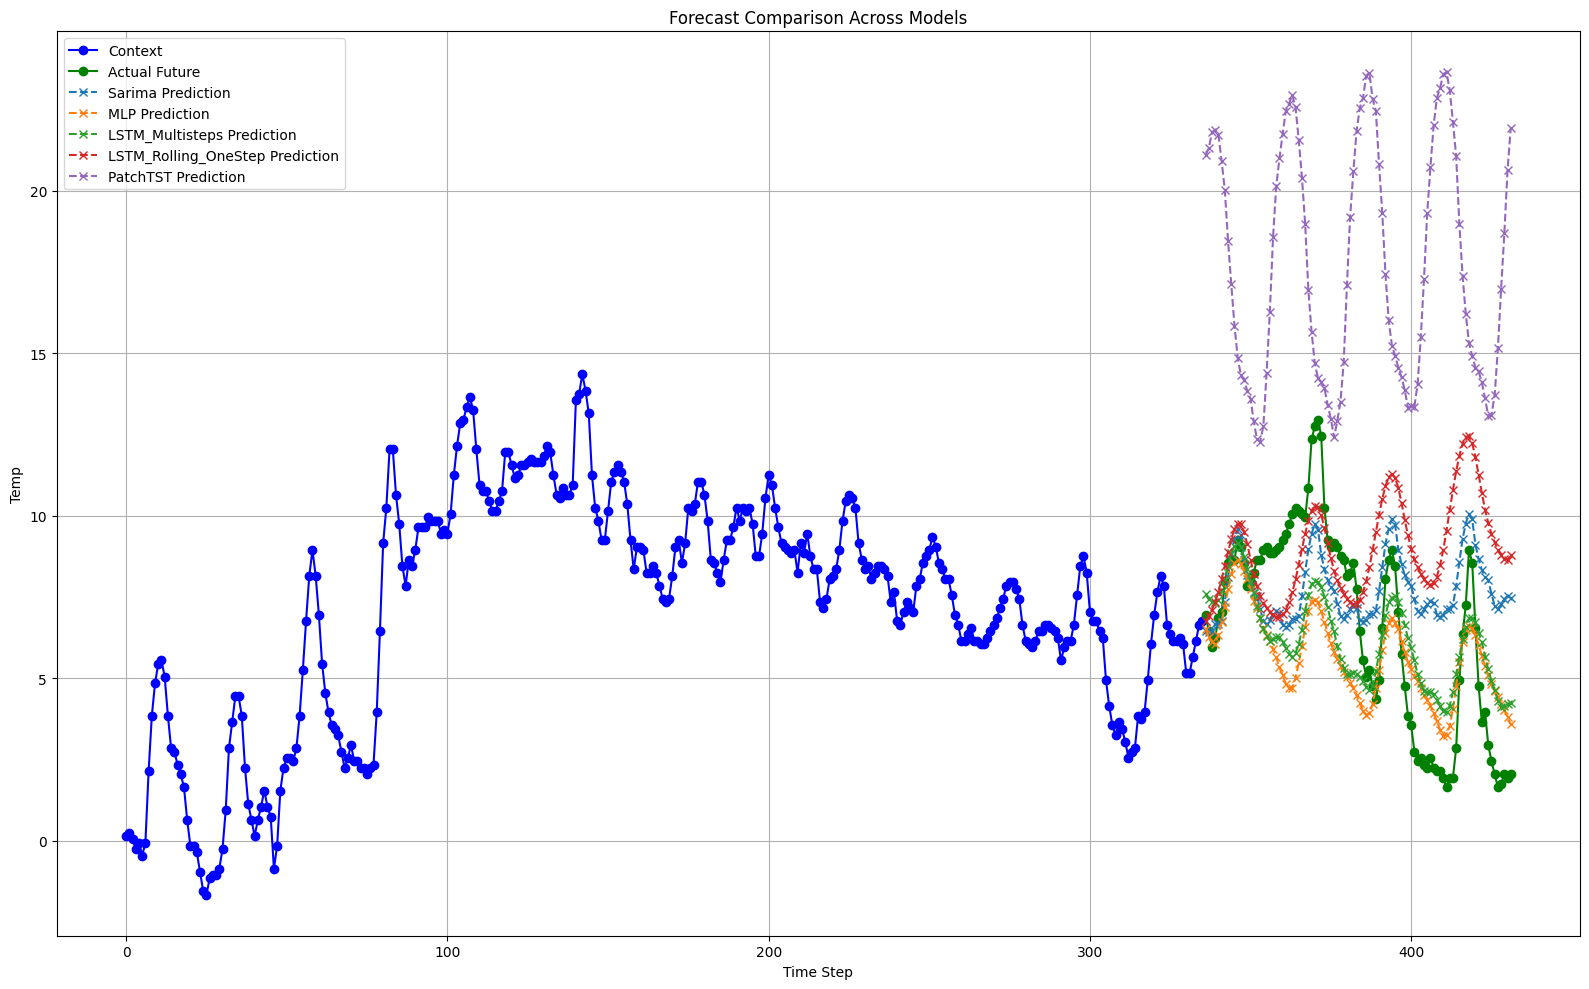

In [14]:
plot_forecast_curves(X_test_sample, Y_test_sample, forecasts, 336, 96)